QUESTION TWO

Importing pandas library

In [3]:
import pandas as pd

Reading the dataset

In [4]:
df = pd.read_csv(r'C:\Users\USER\Desktop\exam_cohort3\Exam\data.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Descriptive statistics

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Understanding the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking and visualing missing values

In [7]:
missing_values = df.isnull().sum()
print( missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Importing seaborn and numpy libraries

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df.replace(['', 'N/A', 'NA', 'Missing'], np.nan, inplace=True)

Visualising missing values

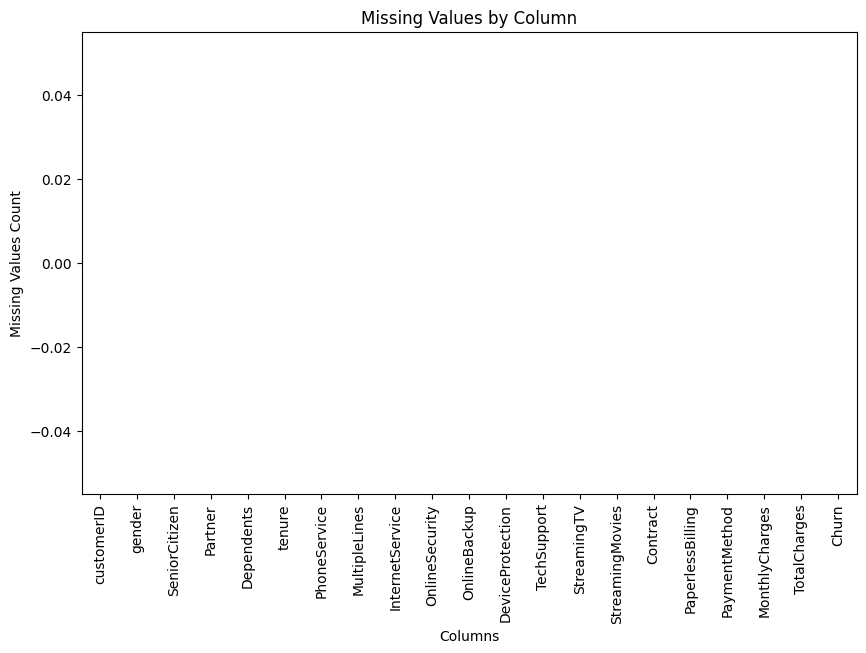

In [10]:

missing_values = df.isnull().sum()
missing_values.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()


Matrix size

In [11]:
df.shape

(7043, 21)

Matrix variables

In [12]:
df.shape[1]

21

Dropping unnecessary columns

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
drop_columns = ['OnlineSecurity', 'MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df = df.drop(columns=drop_columns)

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

Converting TotalCharges column to numeric, coercing errors to NaN

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Calculate the mean value of the TotalCharges column

In [17]:
mean_total_charges = df['TotalCharges'].mean()


Fill missing values in the TotalCharges column with the mean value and finding the number of missing values after filling

In [18]:
df['TotalCharges'].fillna(mean_total_charges, inplace=True)
print("Number of missing values after filling:", df['TotalCharges'].isnull().sum())

Number of missing values after filling: 0


Replacing 0 with No and 1 with Yes in the SeniorCitizen column

In [19]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
print(df['SeniorCitizen'])

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


In [20]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

QUESTION THREE

Exploring the distribution of customer churn 

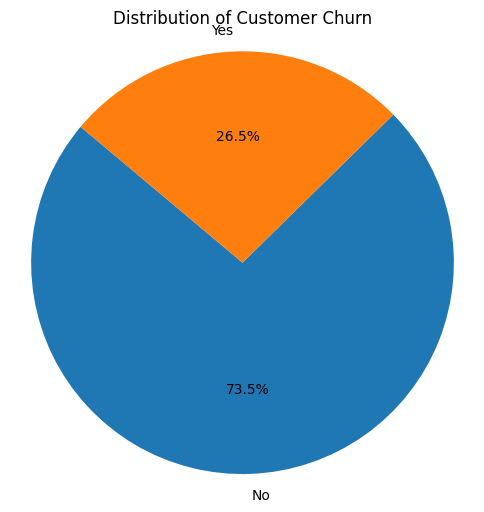

In [21]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Churn')
plt.axis('equal')
plt.show()


The distribution shows that majority of the customers have not churned and a few have.
Understanding the distribution of churned and non-churned customers is important for identifying factors that may influence customer retention. 

How the customer churn distribution varies across gender

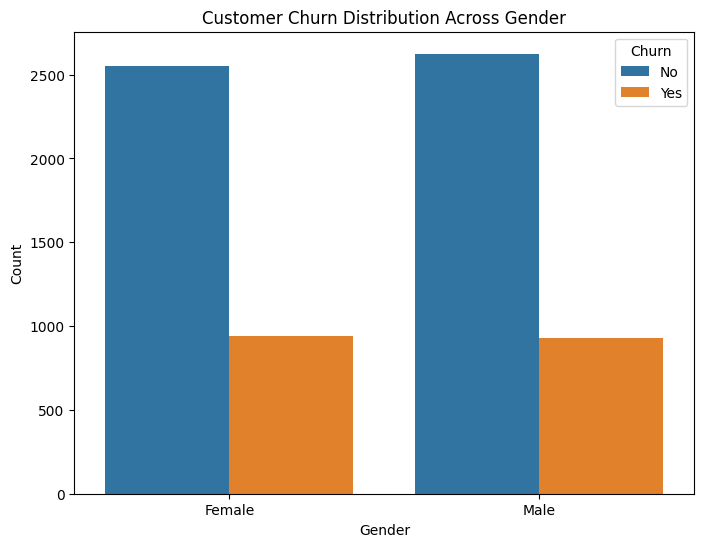

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Customer Churn Distribution Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


From this countplot we observe that the number of the female that have churned is slightly higher than the male the number of the female that have churned is slightly higher than the male.  

How the customer churn distribution varies by contract type

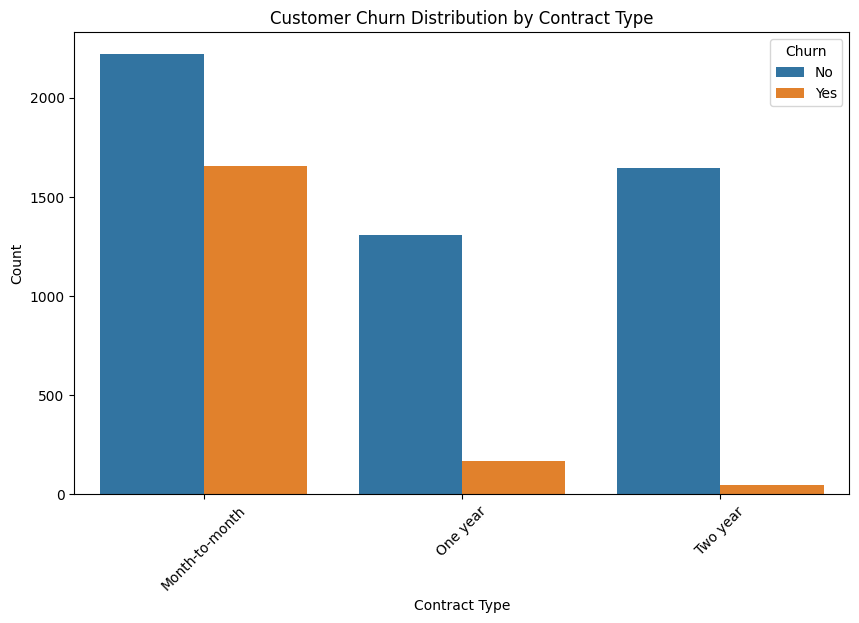

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Customer Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Churn', loc='upper right')
plt.show()


Customers with month-to-month contracts tend to have higher churn rates compared to customers with longerterm contracts.

How the customer churn distribution varies by payment method

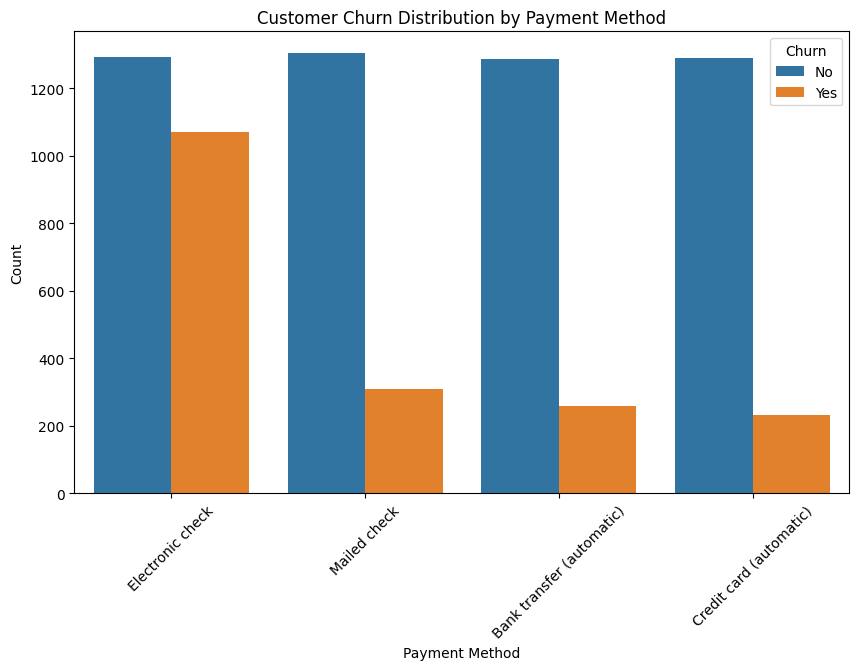

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Customer Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Customers with payment method electronic check churn rates are the highest. Customers with payment method credit card have very low churn rates.

How the customer churn distribution vary by internet service and gender

<Figure size 1000x600 with 0 Axes>

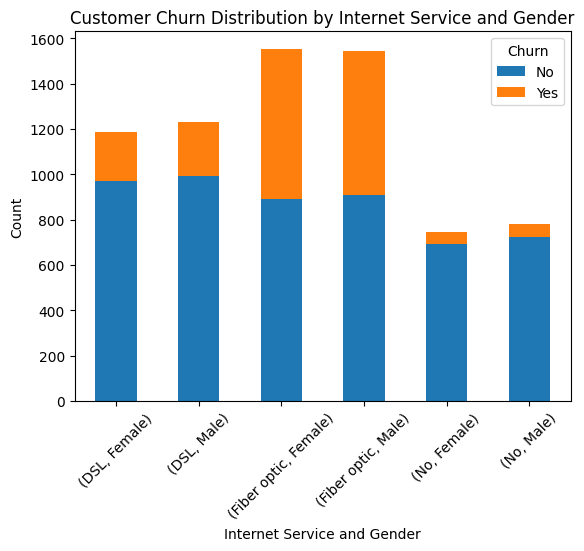

In [25]:
grouped_data = df.groupby(['InternetService', 'gender'])['Churn'].value_counts().unstack().fillna(0)
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Customer Churn Distribution by Internet Service and Gender')
plt.xlabel('Internet Service and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()


Using a grouped bar plot, we observe that both female and male customers with internet service fiber optic have the highest churn rates while the DSL have a moderate churn rate and those with no internet service have the lowest. Fiber optic internet service influences the rate of customer churn.

Visualising and comparing the correlation between churn rates and SeniorCitizen, Partner, Dependents, tenure, PhoneService, PaperlessBilling, MonthlyCharges, TotalCharges


In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import sklearn

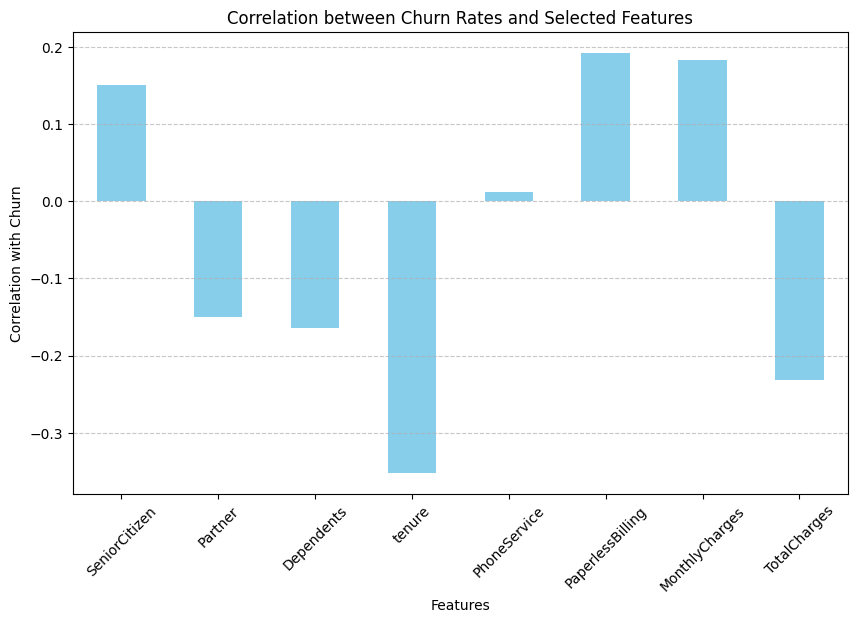

In [28]:
from sklearn.preprocessing import LabelEncoder

#specifying the features
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Creating a subset df with the specified features
subset_df = df[selected_features].copy()  
#encoding categorical labels with numerical labels
label_encoder = LabelEncoder()
for feature in selected_features:
    subset_df[feature] = label_encoder.fit_transform(subset_df[feature])
#    
correlation_with_churn = subset_df.corr()['Churn'].drop('Churn')
plt.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar', color='skyblue')
plt.title('Correlation between Churn Rates and Selected Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





The plot shows the strength and direction of the relationship between each feature and the Churn, the variables in the positive axis  quite affect the churn which is to say the higher they are, the higher the churn and the variables in the negative axis affect the churn since they move in different directions which is to say that the higher they are, the lower the churn and vice versa.

QUESTION FOUR


Performing classification using Logistic Regression and KNN algorithms, we prepare the input matrix (X) and the output vector (y)
select the features.
standardize the scale of selected features using StandardScaler.
combine the standardized features into input matrix X.
encode the target variable 'Churn' using LabelEncoder to convert it into numerical labels.

Fitting the model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

logistic_pipeline = Pipeline([
    ('classifier', logistic_model)
])

knn_pipeline = Pipeline([
    ('classifier', knn_model)
])


Evaluating the model

In [30]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [('Logistic Regression', logistic_pipeline), ('K-Nearest Neighbors', knn_pipeline)]
results = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std(), accuracy_scores.mean(), accuracy_scores.std()))

results_df = pd.DataFrame(results, columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD'])
print(results_df)


             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.831161     0.010427       0.793397      0.005796
1  K-Nearest Neighbors      0.771541     0.009879       0.767661      0.005144


Logistic Regression outperforms the KNN slightly in terms of ROC AUC and accuracy.Logistic Regression might be more suitable for this dataset if ROC AUC and accuracy are the primary evaluation metrics as it yields higher scores on average.

References:
w3schools Data Science, 
Kaggle,  
Data to Fish.